# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'college'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [2]:
# Search for United Tribes Technical College
uttc_gdf = osm.features_from_address(
    'Southwestern Community College, Sylva, NC, United States',
    {'amenity': ['college']})
uttc_gdf

,,nodes,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,name,operator,website,wikidata,wikipedia,geometry
element_type,osmid,,,,,,,,,,,,,
way,601443373,"[5716374257, 5716374258, 5716374259, 571780194...",Sylva,447,28779,NC,College Drive,college,Southwestern Community College - Jackson Campus,Southwestern Community College,https://southwesterncc.edu/,Q7571409,en:Southwestern Community College (North Carol...,"POLYGON ((-83.20984 35.34737, -83.20863 35.346..."


<Axes: >

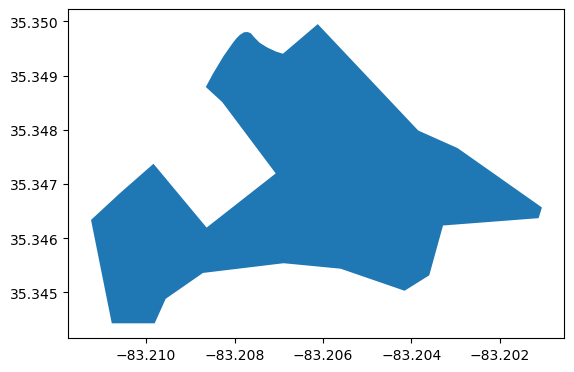

In [3]:
uttc_gdf.plot()

We have a map of the UTTC Campus!

> **Warning**
>
> The Open Street Maps (OSM) database is not always complete. For
> example, try searching for UTTC with the `{'building': True}`, and
> compare it to the [map of the UTTC campus on their
> website](https://uttc.edu/wp-content/uploads/2022/12/CAMPUS-MAP-2022-23.pdf).
> What do you notice?

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [6]:
# Plot UTTC boundary
uttc_map = uttc_gdf.hvplot(
    # Givethe map a descriptive title
    title="Southwestern Community College, Sylva, NC",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='green', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(uttc_map, 'uttc.html')

# Display the map
uttc_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]